In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [3]:
#load model
model=tf.keras.models.load_model('./models/object_detection.h5')#image path
print('model loaded sucessfully')



model loaded sucessfully


In [7]:
path = './images/Cars100.png'
image = load_img(path)
image=np.array(image,dtype=np.uint8)
image1=load_img(path,target_size=(224,224))
image_arr_224=img_to_array(image1)/225.0

In [8]:
#print the size of the original image
h,w,d=image.shape
print("Height of the image=",h)
print("Width of the image=",w)

Height of the image= 267
Width of the image= 400


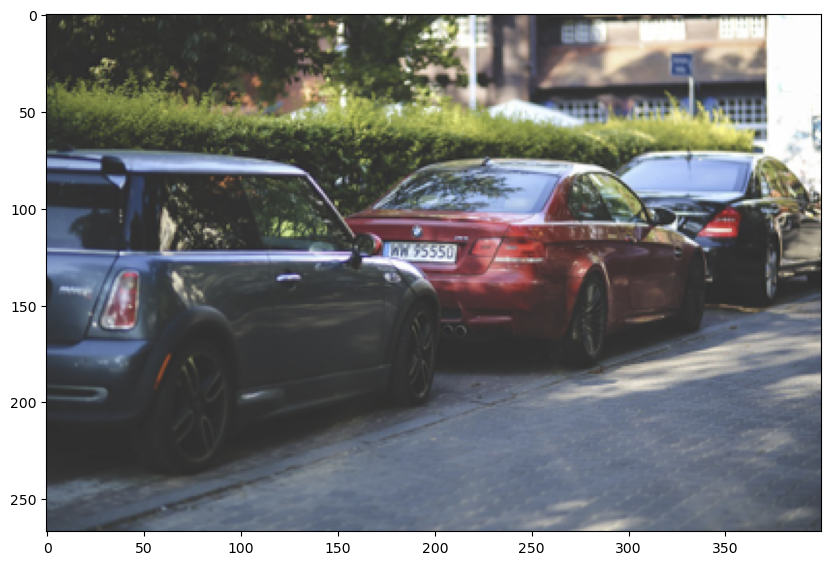

In [9]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [10]:
image_arr_224.shape

(224, 224, 3)

In [11]:
test_arr=image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [12]:
#make predictions
coords=model.predict(test_arr)
coords

1/1 [==============================] - 10s 10s/step


array([[0.42027417, 0.54017484, 0.43411732, 0.4995029 ]], dtype=float32)

In [13]:
#denormalize the values
denorm=np.array([w,w,h,h])
coords=coords*denorm
coords

array([[168.1096673 , 216.06993675, 115.90932369, 133.36727357]])

In [14]:
coords= coords.astype(np.int32)
coords

array([[168, 216, 115, 133]])

In [15]:
xmin,xmax,ymin,ymax=coords[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)
print(pt1,pt2)


(168, 115) (216, 133)


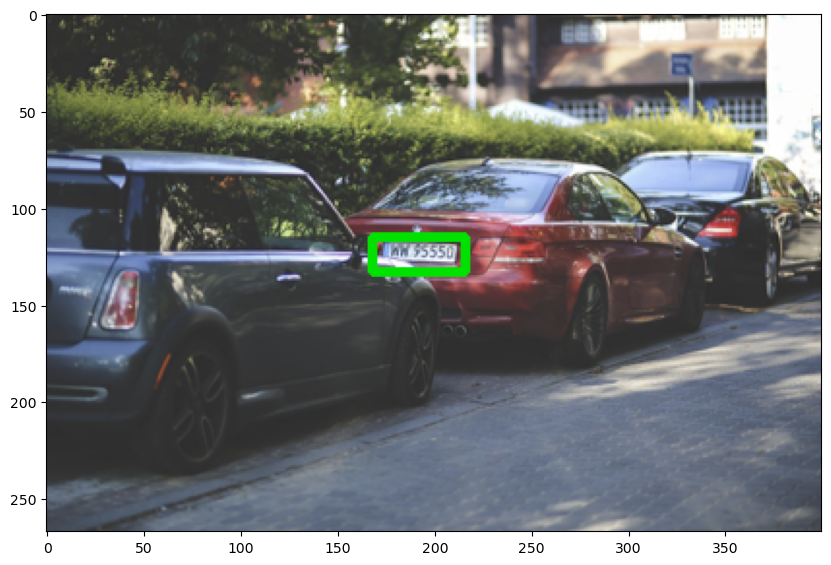

In [16]:
cv2.rectangle(image,pt1,pt2,(0,225,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [43]:

#create a pipeline
path = './images/Cars0.png'
def object_detection(path):
    #read image
    image = load_img(path)
    image=np.array(image,dtype=np.uint8)
    image1=load_img(path,target_size=(224,224))
    #preprocessing
    image_arr_224=img_to_array(image1)/225.0

    h,w,d=image.shape

    test_arr=image_arr_224.reshape(1,224,224,3)
    test_arr.shape

    #make predictions
    coords=model.predict(test_arr)

    #denormalize the values
    denorm=np.array([w,w,h,h])
    coords=coords*denorm
    coords= coords.astype(np.int32)
    #drawing the boundaery box
    xmin,xmax,ymin,ymax=coords[0]
    pt1=(xmin,ymin)
    pt2=(xmax,ymax)
    print(pt1,pt2)

    cv2.rectangle(image,pt1,pt2,(0,225,0),3)

    return image,coords
                         

1/1 [==============================] - 0s 434ms/step
(113, 80) (272, 117)


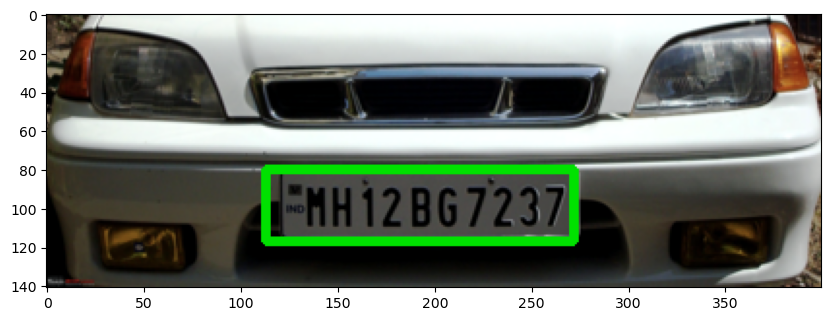

In [44]:

path='./images/Cars12.png'
image, coords = object_detection(path)
plt.figure(figsize = (10,8))
plt.imshow(image)
plt.show()


# OCR


In [45]:
import pytesseract as pt

1/1 [==============================] - 0s 455ms/step
(160, 199) (240, 219)


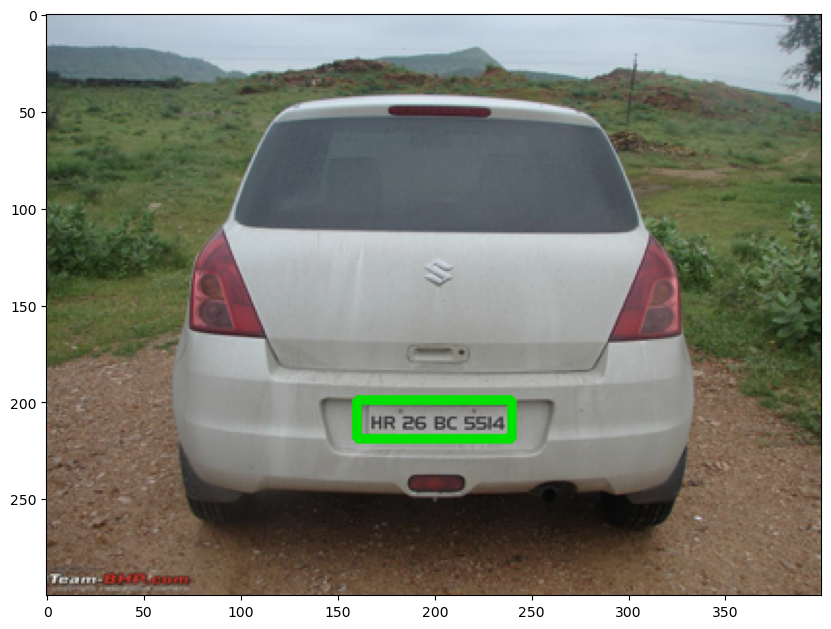

In [67]:

path='./images/Cars101.png'
image, coords = object_detection(path)
plt.figure(figsize = (10,8))
plt.imshow(image)
plt.show()


In [68]:
img = np.array(load_img(path))
xmin, xmax, ymin,ymax=coords[0]
roi=img[ymin:ymax,xmin:xmax]

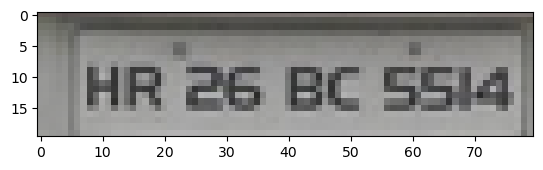

In [69]:
plt.imshow(roi)
plt.show()


In [70]:

#extract text from image
text=pt.image_to_string(roi)
print(text)

Pe
HR 26 BC 5514)

